In [1]:
#import required Libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
#import dataset
data = pd.read_csv("FuelConsumptionCo2.csv")

In [4]:
#view dataset
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
#find some basic statistics for the dataset
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
#extracting main features from the dataset
df1 = data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
df1.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


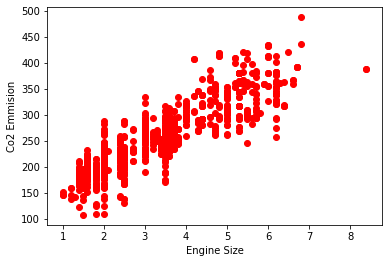

In [7]:
#plotting 'Engine size' and 'co2 Emission' columns to find correlation.
#from plotting it seems both variables are linearly dependent.
plt.scatter(df1[['ENGINESIZE']],df1[['CO2EMISSIONS']], color='red')
plt.xlabel("Engine Size")
plt.ylabel("Co2 Emmision")
plt.show()

In [8]:
#assiging both dataframe in variables 
Engine_Size = df1[['ENGINESIZE']] #feature dataset
Co2_Emission = df1[['CO2EMISSIONS']] #target dataset

In [9]:
#splitting into train and test sets
x_train, x_test, y_train, y_test = train_test_split(Engine_Size, Co2_Emission, test_size=0.2, random_state=0)

In [10]:
x_train

,ENGINESIZE
270,3.6
1006,4.6
728,3.5
992,2.5
702,1.5
...,...
1033,2.0
763,3.5
835,3.7
559,5.0


In [11]:
x_test

,ENGINESIZE
766,5.5
204,2.4
629,2.4
897,2.7
711,2.5
...,...
822,2.0
1029,2.0
798,1.6
803,1.6


In [12]:
y_train

,CO2EMISSIONS
270,290
1006,347
728,244
992,218
702,170
...,...
1033,186
763,256
835,269
559,306


In [13]:
#import linear regression model and create an object for the model
from sklearn import linear_model
regressor = linear_model.LinearRegression()

In [14]:
#train the model
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
#view the co-efficient and Intecept of the model
print("Co-efficient-> ",regressor.coef_)
print("Intercept-> ",regressor.intercept_)

Co-efficient->  [[39.24838431]]
Intercept->  [126.18920155]


In [16]:
#make the prediction
y_prediction = regressor.predict(x_test)

In [17]:
y_prediction

array([[342.05531526],
       [220.3853239 ],
       [220.3853239 ],
       [232.15983919],
       [224.31016233],
       [298.88209252],
       [220.3853239 ],
       [267.48338507],
       [220.3853239 ],
       [322.43112311],
       [267.48338507],
       [393.07821487],
       [243.93435448],
       [298.88209252],
       [181.13693958],
       [283.1827388 ],
       [314.58144625],
       [188.98661645],
       [263.55854664],
       [385.22853801],
       [196.83629331],
       [263.55854664],
       [263.55854664],
       [204.68597017],
       [224.31016233],
       [243.93435448],
       [275.33306193],
       [334.2056384 ],
       [342.05531526],
       [204.68597017],
       [345.9801537 ],
       [224.31016233],
       [263.55854664],
       [243.93435448],
       [196.83629331],
       [188.98661645],
       [349.90499213],
       [220.3853239 ],
       [232.15983919],
       [267.48338507],
       [196.83629331],
       [196.83629331],
       [220.3853239 ],
       [204

In [18]:
X_Train = x_train.to_numpy()
Y_Train = y_train.to_numpy()
Y_Test = y_test.to_numpy()

In [19]:
#check the accuracy of the model using r2_score and MSE
from sklearn.metrics import r2_score, mean_squared_error
print("Mean Square Error : ", mean_squared_error(Y_Test, y_prediction))

Mean Square Error :  1181.528809303555


In [20]:
print("R2-Score : ", r2_score(Y_Test, y_prediction))

R2-Score :  0.7201153918073576


In [21]:
#Visualize the model
coef = regressor.coef_[0][0]
Intercept = regressor.intercept_[0]
print(coef)
print(Intercept)

39.24838431214635
126.18920154724933


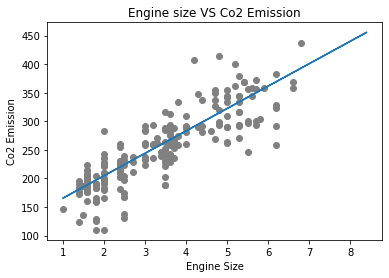

In [22]:
plt.scatter(x_test,y_test,color='grey')
plt.plot(x_train, coef*x_train+Intercept)
plt.xlabel("Engine Size")
plt.ylabel("Co2 Emission")
plt.title("Engine size VS Co2 Emission")
plt.show()